In [24]:
from PIL import Image, ImageFilter
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import os
from skimage.color import rgb2gray
from skimage import filters
from scipy.ndimage.filters import convolve
from skimage import color
from scipy.signal import gaussian
from scipy.signal import fftconvolve
from skimage import measure
from skimage import morphology
from scipy import ndimage as ndi
from skimage import feature

In [15]:
im = plt.imread('/Users/Kristen/Desktop/06282016_8502_8341_ScaledIllumination/8341_5sec_Expt13/processedImages/Cell_1/Nom_crop01.tif') 

<type 'numpy.ndarray'> (58, 63) uint8


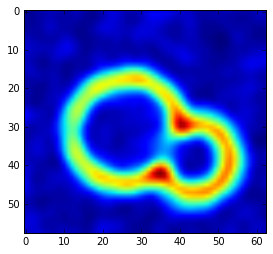

In [16]:
%matplotlib inline

print type(im), im.shape, im.dtype
plt.imshow(im)
    #Unsigned Integers of 8 bits. A uint8 data type contains all whole numbers from 0 to 255. As with all unsigned numbers, 
    #the values must be non-negative. Uint8's are mostly used in graphics (colors are always non-negative).

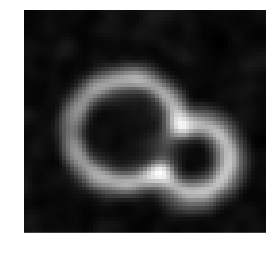

In [17]:
def my_imshow(im, title=None, **kwargs):
    if 'cmap' not in kwargs:
        kwargs['cmap'] = 'gray'
        #something about this converted the above colored image to gray in the lower image
    plt.figure()
    plt.imshow(im, interpolation='none', **kwargs)
    if title: 
        plt.title(title)
    plt.axis('off')
    
my_imshow(im)

[ 0.8824969  1.         0.8824969] (3,)
(3, 3)
gaussian
uniform blur


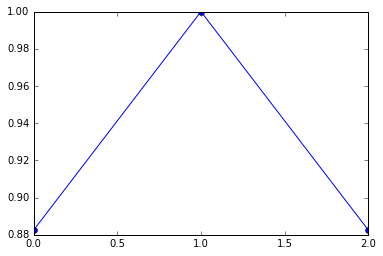

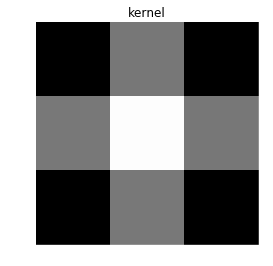

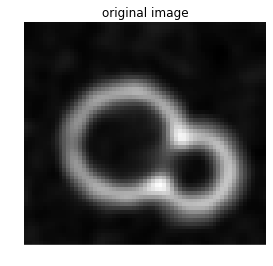

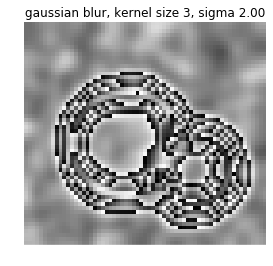

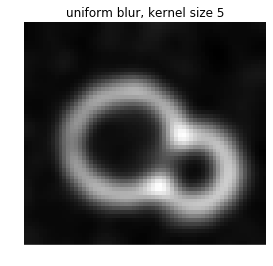

In [18]:
gray_im = color.rgb2gray(im)

#uniform blur

kern_uni = 5
kernel_uni = np.ones((kern_uni, kern_uni))/kern_uni**2

uni_blur = convolve(gray_im, kernel_uni)


#gaussian blur

kern_size = 3
sigma = 2
kernel_1d = gaussian(kern_size, sigma)
print kernel_1d, kernel_1d.shape
kernel = np.outer(kernel_1d, kernel_1d) #
print kernel.shape
gauss_blurred = convolve(gray_im, kernel)

print 'gaussian'
plt.plot(kernel_1d, 'o-')
my_imshow(kernel, 'kernel')
my_imshow(gray_im, 'original image')
my_imshow(gauss_blurred, 'gaussian blur, kernel size %i, sigma %.2f' %(kern_size, sigma))

print 'uniform blur'
my_imshow(uni_blur, 'uniform blur, kernel size %i' % kern_uni)



<type 'numpy.ndarray'>
[[ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 ..., 
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]]
<type 'numpy.ndarray'>
[[0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 ..., 
 [0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]]
[[0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 ..., 
 [0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]]


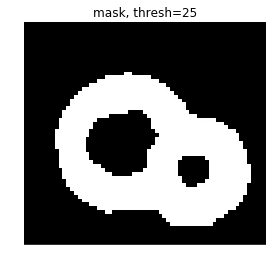

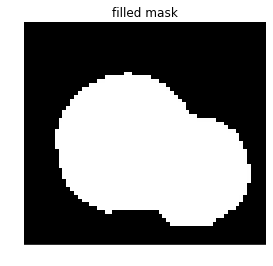

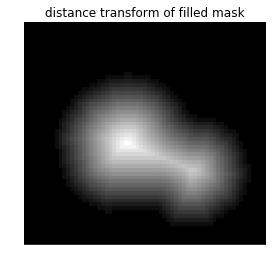

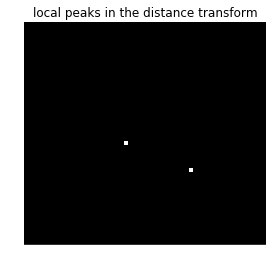

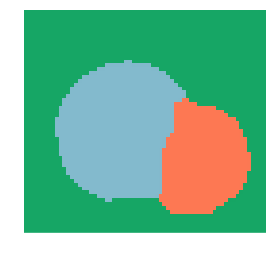

In [66]:
from skimage.morphology import disk
from scipy import ndimage
import matplotlib

random_colors = matplotlib.colors.ListedColormap(np.random.rand(256,3))

thresh = 25
mask = gray_im > thresh
#print mask
#print gray_im
my_imshow(mask, 'mask, thresh=25')

mask_filled = ndimage.binary_fill_holes(mask)
my_imshow(mask_filled, 'filled mask')

distance = ndi.distance_transform_edt(mask_filled)
print type(distance)
print distance
my_imshow(distance, 'distance transform of filled mask')

local_maxi = feature.peak_local_max(distance, indices=False, footprint=np.ones((10,10)))
#print type(local_maxi)
#print local_maxi
my_imshow(local_maxi, 'local peaks in the distance transform')

markers = ndi.label(local_maxi)[0] #what does this do?
print type(markers)
print markers

distance = distance.astype(np.int64, copy=False)
labelled_cells = morphology.watershed(~distance, markers, mask=mask_filled)
print labelled_cells
my_imshow(labelled_cells, cmap=random_colors)

912.0
1228.51315789
1629
539.0
1256.87198516
1840


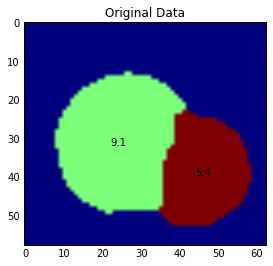

In [99]:
from scipy.ndimage import measurements

mch = "/Users/Kristen/Desktop/06282016_8502_8341_ScaledIllumination/8341_5sec_Expt13/processedImages/Cell_1/mChStack_crop.tif"
im_mch = plt.imread(mch)
gray_mch = color.rgb2gray(im_mch)


#loc = measurements.find_objects(labelled_cells)
#print loc

#slices = ndimage.find_objects(labelled_cells)

fig, ax = plt.subplots()
ax.imshow(labelled_cells)
ax.set_title('Original Data')

regions = measure.regionprops(labelled_cells, gray_mch)

for region in regions:
    y, x = region.centroid
    area = region.area
    area_str = '%.1f' % (area/100)
    mean = region.mean_intensity
    maxi = region.max_intensity
    plt.text(x, y, area_str, color='k', ha='center', va='center')  # ha, va = horizontal alignment,vertical aligment
    print area
    print mean
    print maxi
    




Got EOF error when I tried to load 15


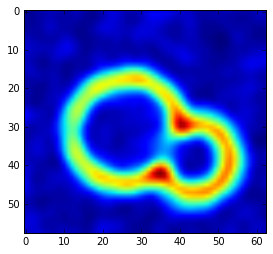

In [109]:
%matplotlib inline
nom = '/Users/Kristen/Desktop/06282016_8502_8341_ScaledIllumination/8341_5sec_Expt13/processedImages/Cell_1/Nom_crop01.tif'
curr_im = Image.open(nom)
plt.imshow(np.asarray(curr_im))

n = 1
while True:
    try:
        curr_im.seek(n)
        n = n+1
    except EOFError:
        print "Got EOF error when I tried to load",  n
        break;

<PIL.TiffImagePlugin.TiffImageFile image mode=L size=63x58 at 0x10D157320>
<PIL.TiffImagePlugin.TiffImageFile image mode=L size=63x58 at 0x10D157320>
<PIL.TiffImagePlugin.TiffImageFile image mode=L size=63x58 at 0x10D157320>
<PIL.TiffImagePlugin.TiffImageFile image mode=L size=63x58 at 0x10D157320>
<PIL.TiffImagePlugin.TiffImageFile image mode=L size=63x58 at 0x10D157320>
<PIL.TiffImagePlugin.TiffImageFile image mode=L size=63x58 at 0x10D157320>
<PIL.TiffImagePlugin.TiffImageFile image mode=L size=63x58 at 0x10D157320>
<PIL.TiffImagePlugin.TiffImageFile image mode=L size=63x58 at 0x10D157320>
<PIL.TiffImagePlugin.TiffImageFile image mode=L size=63x58 at 0x10D157320>
<PIL.TiffImagePlugin.TiffImageFile image mode=L size=63x58 at 0x10D157320>
<PIL.TiffImagePlugin.TiffImageFile image mode=L size=63x58 at 0x10D157320>
<PIL.TiffImagePlugin.TiffImageFile image mode=L size=63x58 at 0x10D157320>
<PIL.TiffImagePlugin.TiffImageFile image mode=L size=63x58 at 0x10D157320>
<PIL.TiffImagePlugin.Tiff

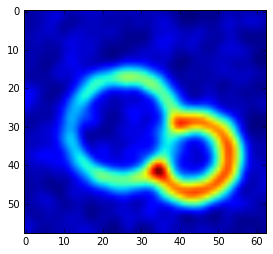

In [116]:
from PIL import ImageSequence
for frame in ImageSequence.Iterator(curr_im):
    

In [120]:
import re
curr_dir = "/Users/Kristen/Desktop/06282016_8502_8341_ScaledIllumination/8341_5sec_Expt13"
for d_name, folders, files in os.walk(curr_dir):
    if re.search('Cell', d_name):
        print "d_name: ", d_name
        print 'folders: ', folders
        print 'files: ', files

d_name:  /Users/Kristen/Desktop/06282016_8502_8341_ScaledIllumination/8341_5sec_Expt13/processedImages/Cell_1
folders:  []
files:  ['Centers_crop.tif', 'intensities.csv', 'mChStack_crop.tif', 'Nom_crop01.tif', 'ROIs.zip', 'Targets_crop.tif', 'Targets_Edges01.tif', 'Targets_intensities.csv']
d_name:  /Users/Kristen/Desktop/06282016_8502_8341_ScaledIllumination/8341_5sec_Expt13/processedImages/Cell_2
folders:  []
files:  ['Centers_crop.tif', 'intensities.csv', 'mChStack_crop.tif', 'Nom_crop02.tif', 'ROIs.zip', 'Targets_crop.tif', 'Targets_Edges02.tif', 'Targets_intensities.csv']
d_name:  /Users/Kristen/Desktop/06282016_8502_8341_ScaledIllumination/8341_5sec_Expt13/processedImages/Cell_3
folders:  []
files:  ['Centers_crop.tif', 'intensities.csv', 'mChStack_crop.tif', 'Nom_crop03.tif', 'ROIs.zip', 'Targets_crop.tif', 'Targets_Edges03.tif', 'Targets_intensities.csv']
d_name:  /Users/Kristen/Desktop/06282016_8502_8341_ScaledIllumination/8341_5sec_Expt13/processedImages/Cell_4
folders:  []
f

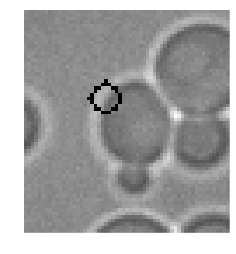

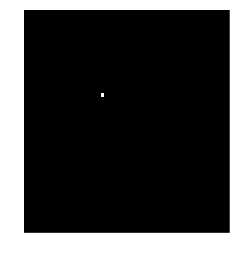

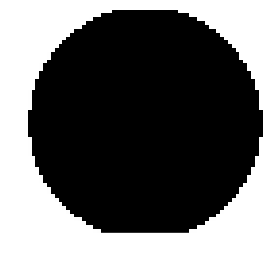

In [156]:
f = '/Users/Kristen/Desktop/06282016_8502_8341_ScaledIllumination/8341_5sec_Expt15/processedImages/Cell_2/Targets_crop.tif'
image = Image.open(f)
im = np.asarray(image)
my_imshow(im)

center = '/Users/Kristen/Desktop/06282016_8502_8341_ScaledIllumination/8341_5sec_Expt15/processedImages/Cell_2/Centers_crop.tif'
cen_image = Image.open(center)
cen = np.asarray(cen_image)
my_imshow(cen)


gray_nom = color.rgb2gray(im)
nom_uni_blur = ndi.uniform_filter(gray_nom, size=5)
#my_imshow(nom_uni_blur)

thresh = 15
my_mask = nom_uni_blur > thresh
            #save mask
#my_imshow(mask, 'mask, thresh=25')    
    
lx, ly = gray_im.shape
X, Y = np.ogrid[0:lx, 0:ly]
new_mask = (X - lx / 2) ** 2 + (Y - ly / 2) ** 2 > lx * ly / 4
my_imshow(new_mask)

#im[new_mask] = 0
#my_imshow(im)

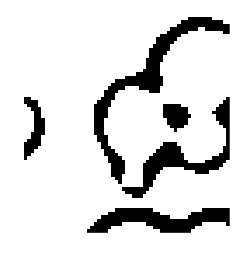

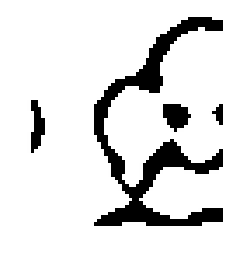

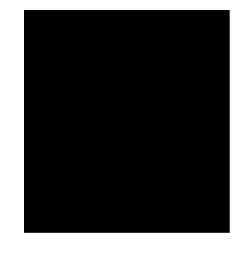

In [196]:
f = '/Users/Kristen/Desktop/06282016_8502_8341_ScaledIllumination/8341_5sec_Expt15/processedImages/Cell_2/Nom_crop02.tif'
image = Image.open(f)
im = np.asarray(image)


center = '/Users/Kristen/Desktop/06282016_8502_8341_ScaledIllumination/8341_5sec_Expt15/processedImages/Cell_2/Centers_crop.tif'
cen_image = Image.open(center)
cen = np.asarray(cen_image)
#my_imshow(cen)
target = cen > 0
dex = np.where(target==True)
dex[0]

gray_nom = color.rgb2gray(im)
#my_imshow(gray_nom)
#print gray_nom
thresh = 110
my_mask = gray_nom < thresh
my_imshow(my_mask)

closed = ~morphology.binary_closing(~my_mask, disk(2))
my_imshow(closed)




In [199]:
a, b = 1, 1 #center of mask
n = 7 #what is n? 2*pi*r? without pi, obviously
r = 3

y,x = np.ogrid[-a:n-a, -b:n-b]
print y
print x

print x*x
print y*y
print r*r
print x*x + y*y
test_mask = x*x + y*y <= r*r

print test_mask

array = np.ones((n, n))
print array
array[mask] = 255
print array

[[-1]
 [ 0]
 [ 1]
 [ 2]
 [ 3]
 [ 4]
 [ 5]]
[[-1  0  1  2  3  4  5]]
[[ 1  0  1  4  9 16 25]]
[[ 1]
 [ 0]
 [ 1]
 [ 4]
 [ 9]
 [16]
 [25]]
9
[[ 2  1  2  5 10 17 26]
 [ 1  0  1  4  9 16 25]
 [ 2  1  2  5 10 17 26]
 [ 5  4  5  8 13 20 29]
 [10  9 10 13 18 25 34]
 [17 16 17 20 25 32 41]
 [26 25 26 29 34 41 50]]
[[ True  True  True  True False False False]
 [ True  True  True  True  True False False]
 [ True  True  True  True False False False]
 [ True  True  True  True False False False]
 [False  True False False False False False]
 [False False False False False False False]
 [False False False False False False False]]
[[ 1.  1.  1.  1.  1.  1.  1.]
 [ 1.  1.  1.  1.  1.  1.  1.]
 [ 1.  1.  1.  1.  1.  1.  1.]
 [ 1.  1.  1.  1.  1.  1.  1.]
 [ 1.  1.  1.  1.  1.  1.  1.]
 [ 1.  1.  1.  1.  1.  1.  1.]
 [ 1.  1.  1.  1.  1.  1.  1.]]


/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:19: VisibleDeprecationWarning: boolean index did not match indexed array along dimension 0; dimension is 7 but corresponding boolean dimension is 64


IndexError: index 7 is out of bounds for axis 0 with size 7

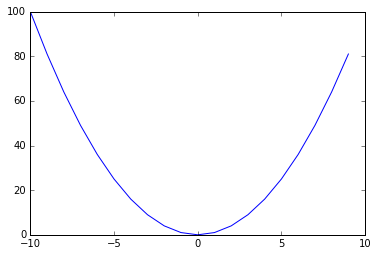

IndexError: list index out of range

In [201]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import trapz

def find_nearest(array,value):
    idx = (np.abs(array-value)).argmin()
    return array[idx]

# Simple mouse click function to store coordinates
def onclick(event):
    global ix, iy
    ix, iy = event.xdata, event.ydata

    # print 'x = %d, y = %d'%(
    #     ix, iy)

    # assign global variable to access outside of function
    global coords
    coords.append((ix, iy))

    # Disconnect after 2 clicks
    if len(coords) == 2:
        fig.canvas.mpl_disconnect(cid)
        plt.close(1)
    return


x = np.arange(-10,10)
y = x**2

fig = plt.figure(1)
ax = fig.add_subplot(111)
ax.plot(x,y)

coords = []

# Call click func
cid = fig.canvas.mpl_connect('button_press_event', onclick)

plt.show(1)


# limits for integration
ch1 = np.where(x == (find_nearest(x, coords[0][0])))
ch2 = np.where(x == (find_nearest(x, coords[1][0])))

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49
 50 51 52 53 54 55 56 57 58 59 60 61 62 63]
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49
 50 51 52 53 54 55 56 57 58 59 60 61 62 63]


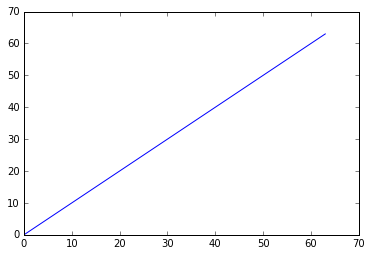

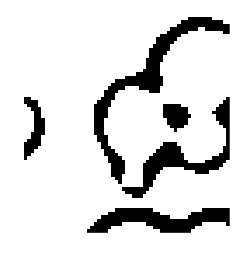

In [211]:
my_mask.shape

x = np.arange(64)
y = np.arange(64)
print x
print y

fig = plt.figure(1)
ax = fig.add_subplot(111)
ax.plot(x,y)

def my_imshow(im, title=None, **kwargs):
    if 'cmap' not in kwargs:
        kwargs['cmap'] = 'gray'
        #something about this converted the above colored image to gray in the lower image
    fig = plt.figure()
    plt.imshow(im, interpolation='none', **kwargs)
    if title: 
        plt.title(title)
    plt.axis('off')
    
    return fig
    
fig = my_imshow(my_mask)

cid = fig.canvas.mpl_connect('button_press_event', onclick)
